# Using cottoncandy to access OpenNeuro data from AWS S3

This examples shows how to use **cottoncandy** to access data from [OpenNeuro](https://openneuro.org/).

To find out more about cottoncandy, checkout our GitHub repo: 
https://github.com/gallantlab/cottoncandy

---
*Contributed by:*
Anwar O Nunez-Elizalde (Aug, 2018)

In [1]:
!pip install cottoncandy nibabel

## A function to download the nifti images as nibabel objects


We will describe each step in the function in the rest of the document.


In [0]:
def download_nifti(object_name, cci):
  '''Use cottoncandy to download a nifti image from the OpenNeuro S3 database
  
  Parameters
  ----------
  object_name : str
    The name of the image to download
  cci : object
    A cottoncandy instance
  
  Returns
  -------
  nifti_image : nibabel.Nifti1Image
  
  Example
  -------
  >>> import cottoncandy as cc
  >>> cci = cc.get_interface('openneuro', ACCESS_KEY='FAKEAC', SECRET_KEY='FAKESK', endpoint_url='https://s3.amazonaws.com')
  >>> nifti_image = download_nifti('ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-06_bold.nii.gz', cci)
  >>> nifti_image.get_data() # return numpy array
  
  See
  ---
  https://github.com/gallantlab/cottoncandy
  '''
  
  import cottoncandy as cc
  cci.set_bucket('openneuro')
  data_stream = cci.download_stream(object_name)
  # Uncompress the data
  uncompressed_data = cc.utils.GzipInputStream(data_stream.content)
  
  try:
    from cStringIO import StringIO
  except ImportError:
    from io import BytesIO as StringIO

  # make a file-object
  container = StringIO()
  container.write(uncompressed_data.read())
  container.seek(0)
  
  import nibabel as nib

  # make an image container
  nifti_map = nib.Nifti1Image.make_file_map()
  nifti_map['image'].fileobj = container
  
  # make a nifti image
  nii = nib.Nifti1Image.from_file_map(nifti_map)
  return nii

## Setting up the cottoncandy connection

In order to run this example, you will need to enter your AWS keys below

In [0]:
ACCESSKEY = 'FAKEAK' 
SECRETKEY = 'FAKESK'

In [4]:
import cottoncandy as cc
cci = cc.get_interface('openneuro', ACCESS_KEY=ACCESSKEY, SECRET_KEY=SECRETKEY, endpoint_url='https://s3.amazonaws.com')

Available buckets:
cottoncandy-test                         2018/08/10 (01:18:55)
Current bucket: openneuro


## Downloading and uncompressing the data

In [0]:
# Get the data stream
data_stream = cci.download_stream('ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-06_bold.nii.gz')
# This is a GZIP Nifti so we need to uncompress it
uncompressed_data = cc.utils.GzipInputStream(data_stream.content)

## Creating a file object

In [0]:
try:
    from cStringIO import StringIO
except ImportError:
    from io import BytesIO as StringIO
# make a file-object
container = StringIO()
container.write(uncompressed_data.read())
container.seek(0)

## Creating a nibabel image

In [0]:
import nibabel as nib

# make an image container
nifti_map = nib.Nifti1Image.make_file_map()
nifti_map['image'].fileobj = container
# make a nifti image
nii = nib.Nifti1Image.from_file_map(nifti_map)

In [8]:
# Get the data!
arr = nii.get_data().T
print(arr.shape)

(134, 30, 64, 64)


## Plotting stuff

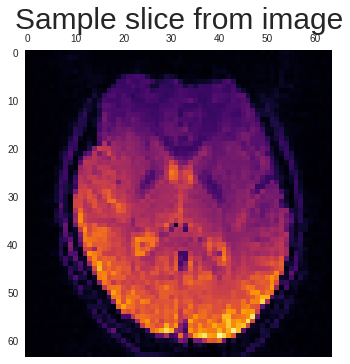

In [9]:
import matplotlib.pyplot as plt
plt.matshow(arr[100,15], cmap='inferno')
plt.grid(False)
__ = plt.title('Sample slice from image', fontsize=30)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


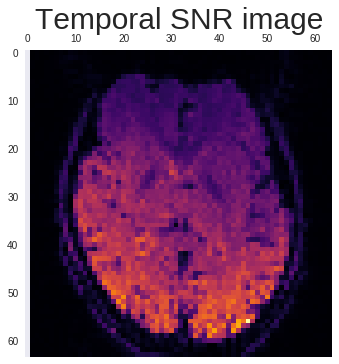

In [10]:
tsnr = arr.mean(0)/arr.std(0)
plt.matshow(tsnr[15], cmap='inferno')
plt.grid(False)
__ = plt.title('Temporal SNR image', fontsize=30)

## Iterating through multiple nifti images from OpenNeuro S3 bucket

In [11]:
cci = cc.get_interface('openneuro', ACCESS_KEY=ACCESSKEY, SECRET_KEY=SECRETKEY, endpoint_url='https://s3.amazonaws.com')
dirs = cci.lsdir()
print(dirs[-10:])
cci.lsdir('ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/')

Available buckets:
cottoncandy-test                         2018/08/10 (01:18:55)
Current bucket: openneuro
[u'ds000245', u'ds000246', u'ds000247', u'ds000248', u'ds000249', u'ds000253', u'ds000254', u'ds000255', u'ds000256', u'ds000258']


[u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-03_bold.json',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-03_bold.nii.gz',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-03_events.tsv',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-06_bold.json',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-06_bold.nii.gz',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-06_events.tsv',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-09_bold.json',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-09_bold.nii.gz',
 u'ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-09_events.tsv',
 u'ds00025

In [12]:
cci.search('ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/*.nii.gz')
# note that the beggining of the file name is cut off in the printed output. 
# this occurs because the object names are very long. 

255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-03_bold.nii.gz 2018/01/10 (19:40:11) 20.8M
255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-06_bold.nii.gz 2018/01/10 (19:40:13) 20.8M
255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-09_bold.nii.gz 2018/01/10 (19:40:15) 20.8M
255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-12_bold.nii.gz 2018/01/10 (19:40:18) 20.8M
255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-15_bold.nii.gz 2018/01/10 (19:40:20) 20.8M
255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewRandom_run-01_bold.nii.gz 2018/01/10 (19:40:22) 23.1M
255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewRandom_run-02_bold.nii.gz 2018/01/10 (19:40:23) 23.1M
255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewRandom_run-04_bold.nii

In [13]:
nifti_files = cci.glob('ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/*.nii.gz')
print(nifti_files[0]) # the full object name

ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-03_bold.nii.gz


## Compute temporal SNR images for individual nifti runs

Working on: ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-03_bold.nii.gz


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  


Working on: ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-06_bold.nii.gz
Working on: ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-09_bold.nii.gz
Working on: ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-12_bold.nii.gz
Working on: ds000255/ds000255_R1.0.0/uncompressed/sub-02/ses-02/func/sub-02_ses-02_task-viewFigure_run-15_bold.nii.gz


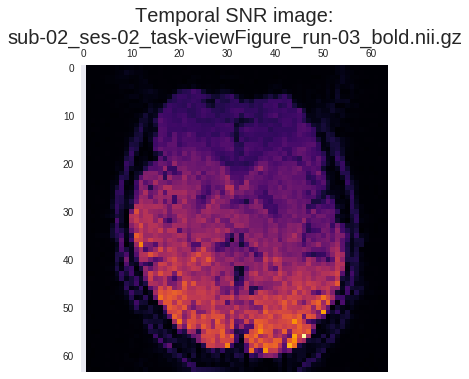

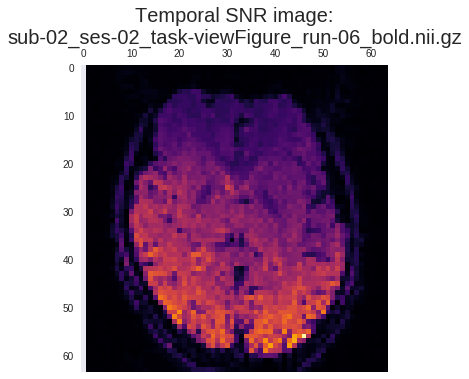

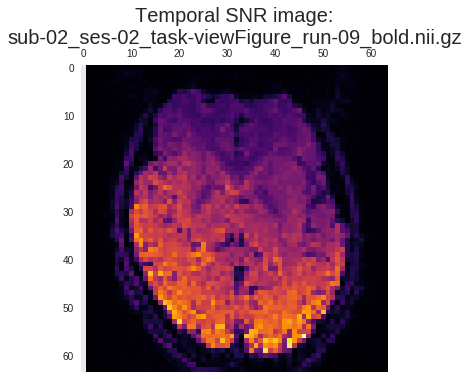

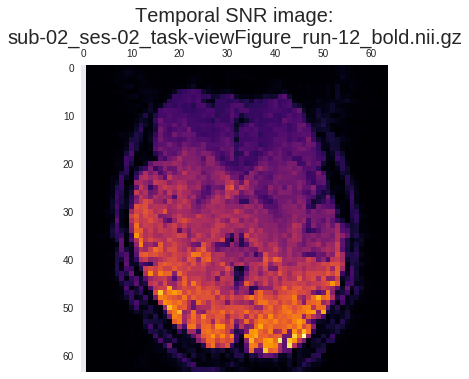

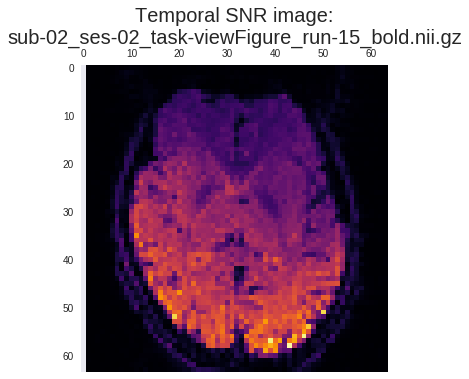

In [14]:
for fl in nifti_files[:5]:
  print('Working on: %s'%fl)
  
  # Use the function defined at the beginning
  nii = download_nifti(fl, cci)
  
  arr = nii.get_data().T
  tsnr = arr.mean(0)/arr.std(0)
  plt.matshow(tsnr[15], cmap='inferno')
  plt.grid(False)
  
  description = fl.split('/')[-1]
  __ = plt.title('Temporal SNR image:\n%s'%description, fontsize=20)